In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.131903425 W= 0.3806923 b= -0.14164828
Epoch: 0100 cost= 0.125554889 W= 0.37289524 b= -0.085556775
Epoch: 0150 cost= 0.119939707 W= 0.36556187 b= -0.032801304
Epoch: 0200 cost= 0.114973187 W= 0.3586647 b= 0.016816558
Epoch: 0250 cost= 0.110580482 W= 0.35217768 b= 0.06348339
Epoch: 0300 cost= 0.106695212 W= 0.3460766 b= 0.10737483
Epoch: 0350 cost= 0.103258915 W= 0.34033823 b= 0.1486558
Epoch: 0400 cost= 0.100219660 W= 0.33494124 b= 0.18748148
Epoch: 0450 cost= 0.097531646 W= 0.32986522 b= 0.22399808
Epoch: 0500 cost= 0.095154308 W= 0.32509112 b= 0.25834256
Epoch: 0550 cost= 0.093051679 W= 0.32060087 b= 0.2906451
Epoch: 0600 cost= 0.091192104 W= 0.31637776 b= 0.32102624
Epoch: 0650 cost= 0.089547552 W= 0.31240582 b= 0.3495999
Epoch: 0700 cost= 0.088093072 W= 0.30866995 b= 0.3764751
Epoch: 0750 cost= 0.086806759 W= 0.30515626 b= 0.40175214
Epoch: 0800 cost= 0.085669272 W= 0.30185184 b= 0.42552426
Epoch: 0850 cost= 0.084663302 W= 0.2987438 b= 0.44788322
Epoch: 0900 cost

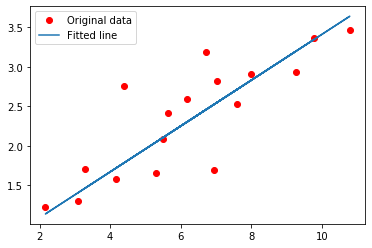

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()